# Алгоритм k-means

Кластеризация позволяет разбить объекты на группы, которые называются **кластерами**.

Похожие объекты оказываются внутри одного кластера. \
Если же объекты разные, то они должны оказаться в разных кластерах.

Также у каждого кластера есть центроид.

**Центроид** — это центр масс кластера, или среднее значение координат объектов кластера.

**Идея алгоритма k-means** состоит в том, \
что он разбивает множество элементов векторного пространства \
на заранее заданное пользователем число кластеров, \
а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера \
до центроида кластера.

Это можно записать в виде формулы: 

$$ V = \sum_{i=1}^{k} \sum_{x\in S_{i}} (x - \mu_{i})^2 $$

Где $k$ - количество кластеров\
$x$ - вектор внутри кластера $S_{i}$\
$\mu_{i}$ - центроид кластера  $S_{i}$

Мы итерируемся по каждому кластеру $S_{i}$\
и для всех векторов $x$ внутри кластера считаем сумму квадратов расстояний до центроида ($\mu_{i}$). \
Необходимо, чтобы значение ($V$), было минимальным.

Алгоритм **k-means** состоит из **девяти шагов**.

**1.** Решаем, на сколько кластеров хотим разделить данные.\
Пусть мы взяли значение, равное $k$.

**2.** Чтобы сформировать кластеры, случайным образом выбираем $k$ объектов из датасета. \
Эти объекты будут представлять $k$ разных кластеров. \
Так как в этих кластерах находится по одному объекту, \
то эти объекты будут считаться исходными центроидами кластеров.

**3.** Распределим оставшиеся объекты датасета по $k$ кластерам.\
Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего.

**4.** Теперь состав кластеров изменился, и центр этих кластеров соответственно тоже изменился. \
Поэтому рассчитываем новые центроиды.

**5.** После этого для каждого объекта в выборке повторяем шаг 3, \
т. е. для каждого объекта датасета рассчитываем расстояние до центроидов.\
В связи с чем некоторые объекты могут поменять свой кластер.

**6.** Шаг 5 повторяется до тех пор, пока объекты датасета не перестанут менять кластеры, к которым они относятся. \
Как только объекты перестают это делать, алгоритм завершается и мы переходим к шагу 7.

**7.** Далее для каждого кластера подсчитаем среднеквадратичное отклонение объектов кластера до центроида. \
И находим суммарное отклонение.\
То есть, считаем $V$

$$ V = \sum_{i=1}^{k} \sum_{x\in S_{i}} (x - \mu_{i})^2 $$

**8.** Далее мы несколько раз заново запускаем алгоритм кластеризации, начиная с шага 2.

Так как на шаге 1 мы выбирали первые объекты кластера случайным образом, \
они могли находится близко друг к другу.\
В таком случае кластеризация получится некачественной.

Чтобы этого избежать, мы повторяем весь алгоритм несколько раз, начиная с шага 2. \
В `sklearn` по умолчанию проводится десять итераций.

**9.** Среди получившихся кластеров нам необходимо найти наилучший вариант кластеризации.

Лучшей будет признана кластеризация с минимальным значением среднеквадратичного отклонения, \
которое рассчитывали на шаге 7.

Если все объекты будут в одном кластере, \
это будет худший сценарий с максимальным среднеквадратичным отклонением.

Если каждый объект будет принадлежать собственному кластеру, отклонение будет нулевым, \
так как один объект будет являться и объектом кластера, и его центром масс, \
а значит расстояние между объектом кластера и центроидом кластера равно нулю. \
Такое разбиение будет считаться переобучением, так как мы слишком подстраиваемся под данные.

> Центры кластера можно определять разными способами. \
В зависимости от этого выделяется **несколько вариаций алгоритма k-means**.

## Вариации алгоритма k-means

### k-means 

Находит центроиды кластера как среднее значение координат.\
[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)\
Параметр для выбора данного алгоритма в **sklearn.cluster.KMeans**: `init='random'`

### k-means++

В классическом алгоритме **k-means** центроиды выбираются случайно, \
но это может приводить к тому, что два объекта, которые находятся близко друг к другу, \
будут центроидами двух разных кластеров — это будет приводить к долгой работе алгоритма.

Алгоритм **k-means++** чуть «хитрее» и выбирает центроиды кластеров не совсем случайно.

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Параметр для выбора данного алгоритма в **sklearn.cluster.KMeans**: `init='k-means++'`. \
По умолчанию в **sklearn** при запуске **k-means** используется алгоритм **k-means++**

### k-medians

На этапе поиска центроидов кластера находит не среднее значение координат, а медиану.

[Документация](https://github.com/UBC-MDS/KMediansPy)

### k-medoids

Работает так же, как **k-medians**, но медианой кластера будет не какая-то точка в кластере, \
а объект, который находится ближе всего к этим координатам медианы кластера.

[Документация](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html)

### fuzzy c-means

Данный алгоритм разрешает нечётко присваивать кластеры. \
Каждый объект может принадлежать к разным кластерам с разной вероятностью.

[Документация](https://github.com/omadson/fuzzy-c-means)

## Реализация в sklearn

Алгоритм кластеризации **k-means** реализован в классе `KMeans` модуля `sklearn.cluster`.

`KMeans` принимает на вход следующие параметры.

- `n_clusters` — количество кластеров. По умолчанию — `8`.
- `init` — способ инициализации центроидов. \
Есть две опции: 
    - `random` (выбирает центроиды случайным образом) и 
    - `k-means++` (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). 
    По умолчанию используется `k-means++`.
- `n_init` — количество случайных инициализаций алгоритма `k-means`. \
В конце будут выбраны те результаты, которые имеют наилучшие значения критерия `k-means`. \
По умолчанию `n_init = 10`.
- `max_iter` — максимальное количество итераций алгоритма `k-means` при одном запуске. \
По умолчанию — `300`.
- `random_state` — параметр, который определяет генерацию случайных чисел для инициализации центроида. \
Чтобы детерминировать случайность, нужно задать какое-нибудь число.

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 

# устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn')

from warnings import simplefilter
simplefilter('ignore')

In [2]:
# загрузим данные об ирисах
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# для кластеризации будем передавать данные без целевого признака species
X = iris_data.drop(columns=['species'])

In [7]:
# инициализируем алгоритм
k_means = KMeans(n_clusters=3, random_state=42)

# обучаем модель на данных X
k_means.fit(X)

# получаем результаты кластеризации 
# (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Визуализируем результат (для наглядности возьмем только 2 координаты `petal_length` и `petal_width`).

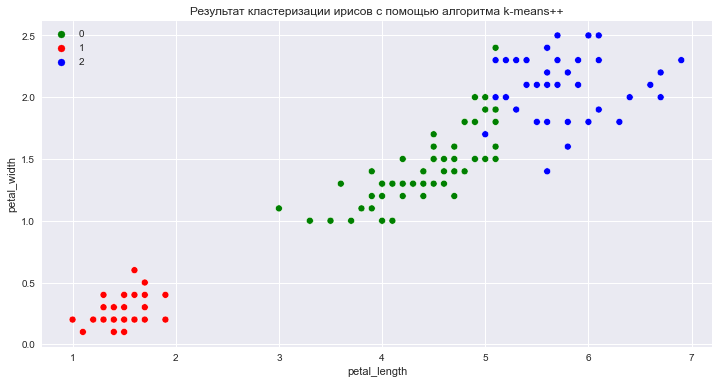

In [10]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize = (12, 6)) 

# диаграмма рассеяния
sns.scatterplot(
    data=iris_data, # датасет
    x='petal_length', # ось абсцисс
    y='petal_width', # ось ординат
    hue=labels, # группировка
    # словарь с соответствием значений из labels цвету точки
    palette={1: 'red', 0: 'green', 2: 'blue'}, 
    ax=ax, # координатная плоскость
);

# Задаём название графику
ax.set_title('Результат кластеризации ирисов с помощью алгоритма k-means++');

plt.legend()

Выведем для сравнения диаграмму рассеяния с реальным значением целевого признака.

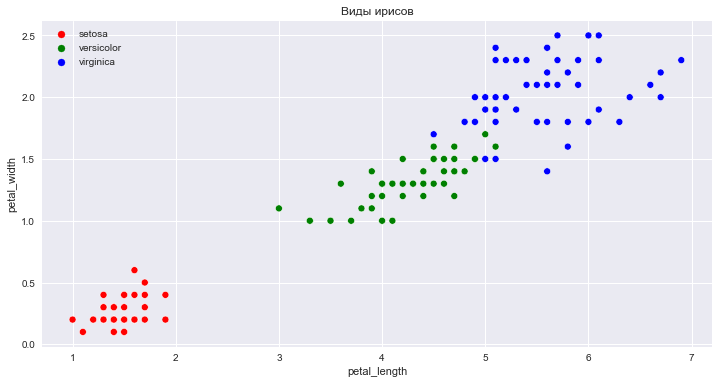

In [11]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize = (12, 6)) 

# диаграмма рассеяния
sns.scatterplot(
    data=iris_data, # датасет
    x='petal_length', # ось абсцисс
    y='petal_width', # ось ординат
    hue='species', # группировка
    # словарь с соответствием значений из species цвету точки
    palette={'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}, 
    ax=ax, # координатная плоскость
);

# Задаём название графику
ax.set_title('Виды ирисов');

plt.legend()

Кластер с видом `setosa` определен так же, как целевой признак.\
Кластеры с `versicolor` и `virginica` несколько различаются с тем, как распределен реальный целевой признак, \
потому что изначально они находятся близко друг к другу.

In [15]:
# если в модель необходимо передать новые данные
X_new = pd.DataFrame({ 
    'sepal_length': [5.2],
    'sepal_width': [3.6],
    'petal_length': [1.5],
    'petal_width': [0.3],
})

# метки кластеров можно получить с помощью метода predict
predict = k_means.predict(X_new)

predict

array([1])

## Недостатки алгоритма k-means

- Необходимо заранее задать количество кластеров. При большом количестве признаков оно может быть неочевидным.
- Для объектов, которые в равной степени принадлежат разным кластерам, алгоритм k-means будет отрабатывать плохо.
- Алгоритм чувствителен к выборосам в данных, так как они искажают расположение центроидов.
- Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.\
![](./images/k-means-irregular-shape.png)

- Так как центроиды определяются случайным образом, \
результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

## Определение оптимального количества кластеров

### Метод локтя (elbow plot)

Метод позволяет найти такое оптимальное число кластеров, \
чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

В самом начале при добавлении новых кластеров качество моделирования улучшается. \
Эта область называется **недообученной (underfitting)**.

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, \
а значит стоит прекратить их добавление. \
Данная область называется **переобученной (overfitting)**.

Чтобы определить оптимальное количество кластеров, используя метод локтя, \
необходимо нарисовать график, на котором по оси **x** будет отложено **количество кластеров**, \
а по оси **y** — **инерция**.

> **Инерция** — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

Иначе говоря, инерция считается по приведенной выше формуле.

$$ V = \sum_{i=1}^{k} \sum_{x\in S_{i}} (x - \mu_{i})^2 $$

Построим такой график для данных по ирисам.

Text(0, 0.5, 'Инерция')

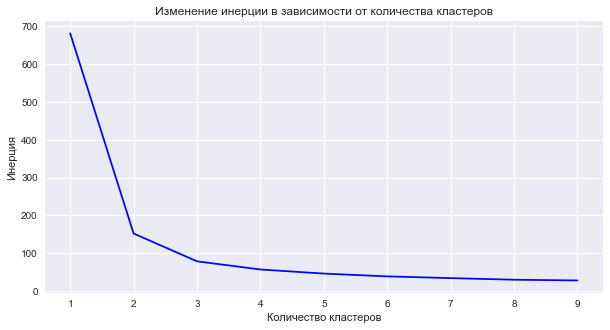

In [19]:
def get_inertia(cluster_num: int, X: pd.DataFrame) -> float:
    """Возвращает значение инерции для переданных данных и заданного количества кластеров

    Args:
        cluster_num (int): количество кластеров
        X (pd.DataFrame): данные

    Returns:
        float: значение инерции
    """
    # инициализируем алгоритм кластеризации
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    
    # запускаем алгоритм k-means
    k_means.fit(X)
    
    # находим значение инерции
    inertia = k_means.inertia_
    
    # возвращаем значение инерции
    return inertia

# пустой список для значений инерции
inertia = []
# задаем список кластеров от 1 до 9
clusters = range(1, 10)

# итерируемся по разным размерам кластеров
# и сохраняем значение инерции для каждого кластера
for cluster_num in clusters:
    # сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(10, 5)) 

# визуализируем, как менялась инерция в зависимости от количества кластеров
ax.plot(clusters, inertia, 'xb-')

# название графика и подписки для осей
ax.set_title('Изменение инерции в зависимости от количества кластеров')
ax.set_xlabel('Количество кластеров')
ax.set_ylabel('Инерция')

По графику видно, что оптимальным количеством кластеров являются значения **2** или **3**.

По виду форма графика похожа на руку, согнутую в локте. \
Поэтому метод назвается "Метод локтя".

Бывает, что точка перегиба определяется нечетко (как в данном случае).\
Тогда можно воспользоваться методом силуэта (описан ниже).

### Коэффициент силуэта (Average Silhouette Method)

Для данного метода на графике по оси **x** также откладывается **количество кластеров**, \
а по оси **y** — **значение коэффициента силуэта**.

> **Коэффициент силуэта** показывает, насколько объект похож на объекты кластера, \
в котором он находится, по сравнению с объектами из других кластеров.

Коэффициент силуэта определяется для каждого элемента и состоит из двух баллов:

- **a** - среднее расстояние между элементом и всеми другими точками того же класса.
- **b** - среднее расстояние между элементом и всеми другими точками в следующем ближайшем кластере.

Коэффициент силуэта **s** для одного элемента определяется как:

$$ s = \frac{b — a}{max(a, b)} $$

Коэффициент силуэта для набора элементов определяется \
как среднее значение коэффициента силуэта для каждого элемента.

Text(0, 0.5, 'Коэффициент силуэта')

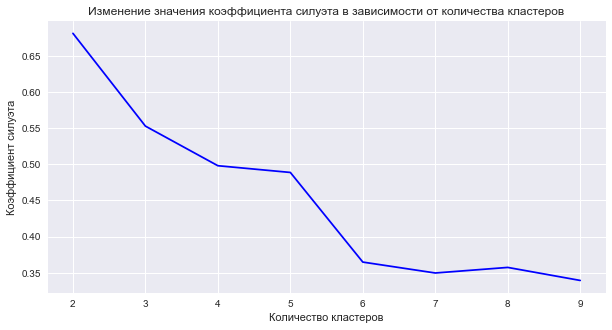

In [22]:
def get_silhouette(cluster_num: int, X: pd.DataFrame) -> float:
    """Возвращает коэффициент силуэта для переданных данных и заданного количества кластеров

    Args:
        cluster_num (int): количество кластеров
        X (pd.DataFrame): набор данных

    Returns:
        float: коэффициент силуэта
    """
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    
    # подсчитаем метрику силуэта
    silhouette = metrics.silhouette_score(X, k_means.labels_)
    
    return silhouette

# пустой список для значений коэффициента силуэта
silhouette = []
# задаем список кластеров от 2 до 9
clusters = range(2, 10)

# итерируемся по разным размерам кластеров
# и сохраняем значение коэффициента силуэта для каждого кластера
for cluster_num in clusters:
    # сохраняем значения
    silhouette.append(get_silhouette(cluster_num, X))

# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(10, 5)) 

# визуализируем, как менялось значение коэффициента силуэта в зависимости от количества кластеров
ax.plot(clusters, silhouette, 'xb-')

# название графика и подписки для осей
ax.set_title('Изменение значения коэффициента силуэта в зависимости от количества кластеров')
ax.set_xlabel('Количество кластеров')
ax.set_ylabel('Коэффициент силуэта')

По графику видно, что оптимальным количеством кластеров является значение **2**.\
Для построения данного графика нужно минимум 2 кластера,\
так как мы сравниваем объекты одного кластера с другим, наиболее близким кластером.

### Статистика разрыва (Gap Statistic Method)

Метод описан например [здесь](https://skine.ru/articles/43267/) 